# Things to do:

- set up a score parameter
- convert to datetime
- one hot encoding for meal and days
- save the processed data


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
mess = pd.read_csv("data/mess_data.csv")
mess

,date,mess,meal,excellent,good,okay,poor,day
0,2023-09-21,2,dinner,4,21,94,107,Thursday
1,2023-09-26,2,lunch,45,91,37,6,Tuesday
2,2023-09-26,1,lunch,0,19,82,44,Tuesday
3,2023-09-26,2,dinner,0,20,81,45,Tuesday
4,2023-09-26,1,dinner,6,24,29,57,Tuesday
...,...,...,...,...,...,...,...,...
322,2024-04-29,1,lunch,1,35,34,14,Monday
323,2024-04-29,2,breakfast,1,0,6,92,Monday
324,2024-04-29,1,breakfast,2,5,7,92,Monday
325,2024-05-02,2,dinner,0,0,9,88,Thursday


In [3]:
mess.date = pd.to_datetime(mess.date)
mess = mess.astype({"mess": 'category', "day": 'category', "meal": 'category'})
mess.dtypes

date         datetime64[ns]
mess               category
meal               category
excellent             int64
good                  int64
okay                  int64
poor                  int64
day                category
dtype: object

<Axes: xlabel='score', ylabel='Count'>

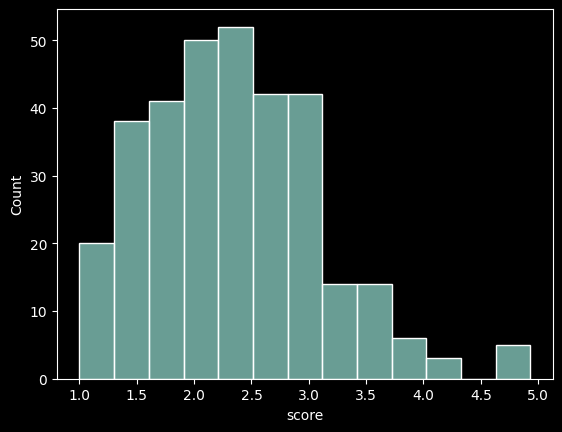

In [4]:
total = mess['poor'] + mess['okay'] + mess['good'] + mess["excellent"]
mess['score'] = (mess['poor']+3*mess['okay']+4 *
                 mess['good']+5*mess["excellent"])/(total)
sns.histplot(x=mess.score)

In [5]:
# mess.to_csv("data/mess_data_processed.csv", index=False)

In [6]:
cols = [mess['excellent'], mess['good'], mess['okay'], mess['poor']]
sum(cols)

0      226
1      179
2      145
3      146
4      116
      ... 
322     84
323     99
324    106
325     97
326    118
Length: 327, dtype: int64

In [7]:
# scaler = preprocessing.RobustScaler()
# mess.score = scaler.fit_transform(pd.DataFrame(mess.score))
# mess.score

In [8]:
# Importing sklearn modules
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

print("Setup Completed!")

Setup Completed!


In [9]:
mess_enc = pd.get_dummies(mess.drop(['date', 'mess'], axis=1), drop_first=True)
X = mess_enc
y = mess.mess
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
mess_enc

,excellent,good,okay,poor,score,meal_dinner,meal_lunch,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,4,21,94,107,2.181416,True,False,False,False,False,True,False,False
1,45,91,37,6,3.944134,False,True,False,False,False,False,True,False
2,0,19,82,44,2.524138,False,True,False,False,False,False,True,False
3,0,20,81,45,2.520548,True,False,False,False,False,False,True,False
4,6,24,29,57,2.327586,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1,35,34,14,3.107143,False,True,True,False,False,False,False,False
323,1,0,6,92,1.161616,False,False,True,False,False,False,False,False
324,2,5,7,92,1.349057,False,False,True,False,False,False,False,False
325,0,0,9,88,1.185567,True,False,False,False,False,True,False,False


In [10]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
forest = RandomForestClassifier(n_estimators=50)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           1       0.51      0.50      0.51        38
           2       0.58      0.59      0.58        44

    accuracy                           0.55        82
   macro avg       0.55      0.55      0.55        82
weighted avg       0.55      0.55      0.55        82



In [13]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_score = cross_val_score(svm, X_train, y_train, cv=5).mean()
svm_score

0.48571428571428577

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_score = cross_val_score(logreg, X_train_scaled, y_train, cv=5).mean()
logreg_score

0.44897959183673475